# Deep Examples

## Confidence Intervals for Sampling Proportions

### Create Population

Let us create a population of 10000 balls, with 60% yellow balls. Programmatically, our population contains 1s and 0s, 1 indicating yellow. 

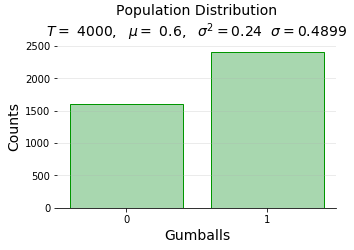

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from SDSPSM import get_metrics, drawBarGraph
from ci_helpers import create_bernoulli_population

T = 4000   # total size of population
p = 0.6    # 60% has yellow balls

# create population
population, population_freq = create_bernoulli_population(T,p)

# population metrics
mu, var, sigma = get_metrics(population)

# visualize
fig, (ax1) = plt.subplots(1,1, figsize=(5,3))
drawBarGraph(population_freq, ax1, [T, mu, var, sigma], 'Population Distribution','Gumballs', 'Counts',xmin=0)
plt.show()

Deriving and visualizing the probability Mass function (the intermediate density function, where total area of bars will be 1,  is just for fitting normal continous approximation later)

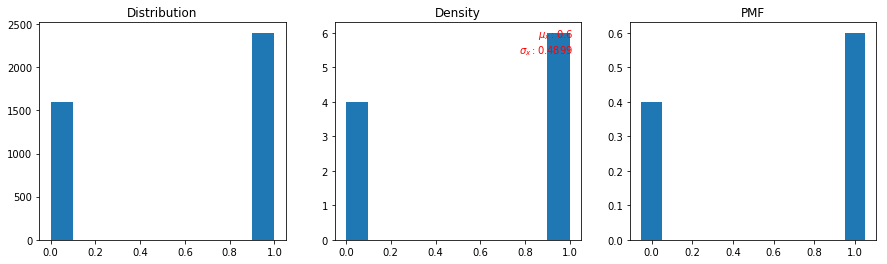

In [2]:
from ci_helpers import mini_plot_SDSP 

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
mini_plot_SDSP(population, ax1,ax2,ax3, norm_off=True)
plt.show()

### Sampling from the Population 

Let us sample from population, N no of times, each time with sample set of size n. If $np \geq 30$ and $nq \geq 30$, the resulting sampling distribution should be approximately normal.  Remember, for Population described by random variable <b>Y</b>, we describe the sampling distribution by

\begin{equation}
\color {blue}{
\begin{aligned}
\text{for any sample set k, sample mean is} \ \ \overline{\widehat{Y_k}} = \dfrac {1}{n} \sum\limits_{i=1}^n Y_{ki} \\ \\
\text{Random Variable} \ \ \widehat{p} =  \overline{\widehat{Y}} =  \overline{\widehat{Y_1}},\overline{\widehat{Y_2}},\cdots\overline{\widehat{Y_k}}\cdots\overline{\widehat{Y_N}} \\ \\
\mu_{\widehat{p}} = \mu(\overline{\widehat{Y}}) \\ \\
\sigma_{\widehat{p}} = \sigma(\overline{\widehat{Y}})
\end{aligned}
}
\end{equation}

where the hat $\widehat{}$ indicates the statistical outcome. And statistically by CLT, 


\begin{equation}
\color {blue} {
\begin{aligned}
\mu_{\widehat{p}} \approx 0.6 = \mu = p \\ \\
\sigma_{\widehat{p}} \approx 0.0693 \approx \dfrac{0.4898}{\sqrt{50}} = \dfrac {\sigma}{\sqrt{n}} = \sqrt{\dfrac {p(1-p)}{n}}
\end{aligned}
}
\end{equation}

>Note we have sampled WITH REPLACEMENT, so the samples are independent. If you sample without replacement, you need to factor in FPC (finite population correction) for each sample set's SD. 

<IPython.core.display.Math object>

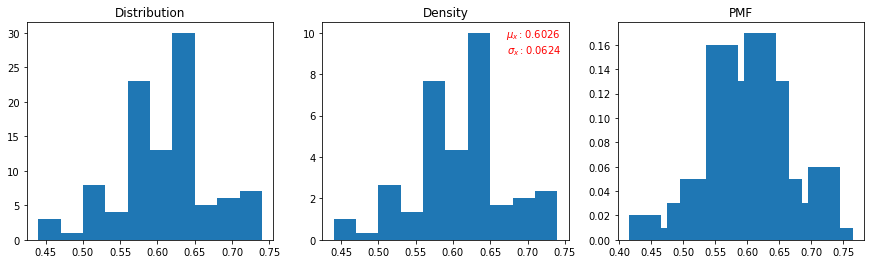

In [3]:
from ci_helpers import sample_with_CI
from random import seed

N = 100
n = 50

#seed(0)

# sample from population
Y_mean_list, CI_list = sample_with_CI(N, n, population, sigma=sigma, mode='z')

# sample metrics
mu, var, sigma = get_metrics(Y_mean_list)

# visualize
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
mini_plot_SDSP(Y_mean_list,ax1,ax2,ax3,width=0.05,  norm_off=True)

from IPython.display import display, Math
display(Math(r'\mu_{{\hat{{p}}}}:{} \ \ \ \ \sigma_{{\hat{{p}}}}:{}'.format(mu, sigma)))

### When $\sigma$ is known

For each of above sample set of size 'n', let us calculate confidence interval using population SD $\sigma$ as below. 1.96 is from Z tranformation for 95% confidence interval, like we saw earlier in our theoretical section.

\begin{equation}
\color{blue}{CI = \dfrac{Y}{n} \pm 1.96 \dfrac{\sigma}{\sqrt{n}}}  
\end{equation}

where, $Y$ is a random variable, representing no of successes in a sample set, and $\dfrac{Y}{n}$ is random variable,for each sample set's **mean**, i.e $\dfrac{Y}{n} = \overline{\widehat{Y_k}} = \dfrac {1}{n} \sum\limits_{i=1}^n Y_{ki}$. This is however called **sample proportion** which is a better term, because it also indicates the proportion of success in a sample set (for eg, in this eg, no of 1s in sample set divided by no of samples simply gives the proportion of 1s in the sample set)

CI containing pop.mean:96.0%


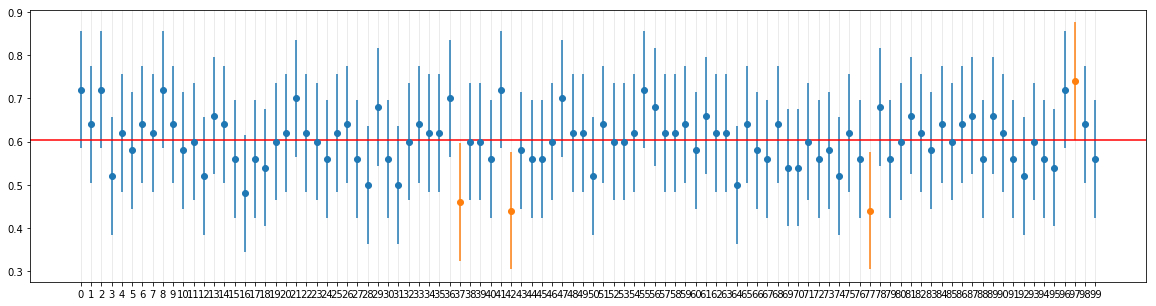

In [4]:
from ci_helpers import plot_ci_accuracy_1

fig, ax = plt.subplots(1,1, figsize=(20,5))
   
plot_ci_accuracy_1(ax, CI_list, mu)
plt.show()

As expected we observe that out of all CIs above, 95% of them or above contain population mean.

### When $\sigma$ is not known

For each sample mean $\overline{X_k}$ calculated, the confidence interval is calculated as below. Note, the constant value $t_{n-1}$ depends on degrees of freedom (n-1). 


\begin{equation}
\color{blue}{CI = \dfrac{Y}{n} \pm t_{n-1} \dfrac{S_k}{\sqrt{n}}}
\end{equation}

where, $Y$ is a random variable, representing no of successes in a sample set, and $\dfrac{Y}{n}$ is random variable,for each sample set's **mean**, i.e $\dfrac{Y}{n} = \overline{\widehat{Y_k}} = \dfrac {1}{n} \sum\limits_{i=1}^n Y_{ki}$. This is however called **sample proportion** which is a better term, because it also indicates the proportion of success in a sample set (for eg, in this eg, no of 1s in sample set divided by no of samples simply gives the proportion of 1s in the sample set)

Hope you also noted. This time, for each sample mean, we also calculate unbiased sample variable of that set (that is, divided by n-1), and use that for calculating $M_k$. We sample again, because, for each sample, this time, we calculate CI using t distribution. 

**t value for 95% CI:**

Degrees of Freedom $df=n-1$. For 95% confidence level, the confidence coefficient, $1 - \alpha =  1 - 0.05 = 0.95$. 

To calculate $t$ in python, we simply need to pass, $(1-\alpha, df)$. A sample calculation shown below for sample size $n = 10$

In [5]:
from scipy import stats
print(stats.t.ppf(1-0.025, 10-1))

2.2621571627409915


Now to our sampling distribution. Note, we are getting an approximate normal distribution. 

<IPython.core.display.Math object>

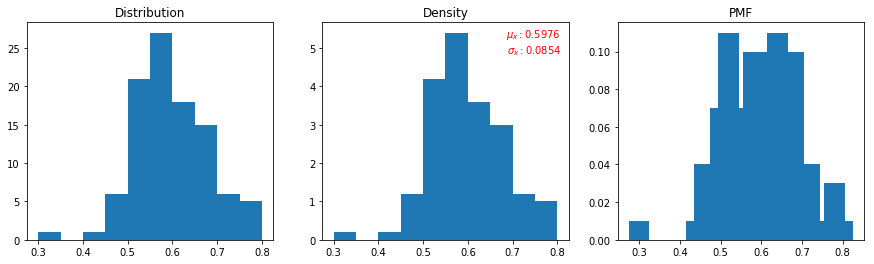

In [6]:
from ci_helpers import sample_with_CI

N = 100
n = 50

#seed(0)

# sample from population, this time in t mode, 
# so CI intervals are calculated with t value 2.093
Y_mean_list, CI_list = sample_with_CI(N, n, population, sigma=sigma, mode='t')

# sample metrics
mu, var, sigma = get_metrics(Y_mean_list)

# visualize
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
mini_plot_SDSP(Y_mean_list,ax1,ax2,ax3,width=0.05,  norm_off=True)

from IPython.display import display, Math
display(Math(r'\mu_{{\hat{{p}}}}:{} \ \ \ \ \sigma_{{\hat{{p}}}}:{}'.format(mu, sigma)))

plt.show()

CI containing pop.mean:93.0%


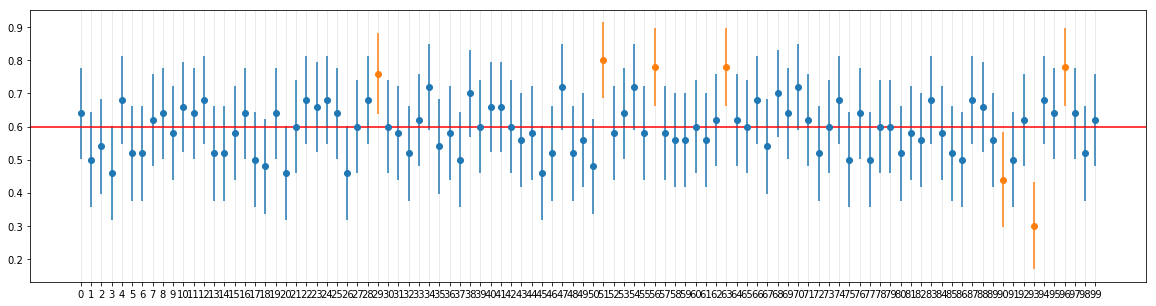

In [7]:
from ci_helpers import plot_ci_accuracy_1

fig, ax = plt.subplots(1,1, figsize=(20,5))
   
plot_ci_accuracy_1(ax, CI_list, mu)
plt.show()

Generally we should get more than 95% as above. Above result just means, if we take a sampling size, and calculate CI, and do that 100 times, about 95 times our CI would contain population mean, and our result gave 97 times. We could expect at least 95% most of the time.  But can we get any idea, how that "success" of getting population mean in our CI, 95% of time, depends on sample size? We get it, greater the sample size, better, but how it would be? Let us take our simulation to next scale as below, trying with various experiment and sample sizes. 

<a id="digging-deeper-1"></a>

### Digging deeper 1

What if I use Z distribution and unbiased sample SD even for CI? What happens when I use t distribution but population SD for CI? We will find out what happens in such cases below. 

**Environment:**  
1. Population size T, fixed  
2. Sample size n, varied  
3. Experiment size N, varied  
4. Sampling with or without replacement, varied.


**Applied methods:**  
1. Z distribution and population SD  
2. Z distribution and unbiased sample SD  
3. T distribution and population SD  
4. T distribution and unbiased sample SD  

Note, in case of sampling without replacement, each sample SD is corrected with FPC (Finite Population Correction)

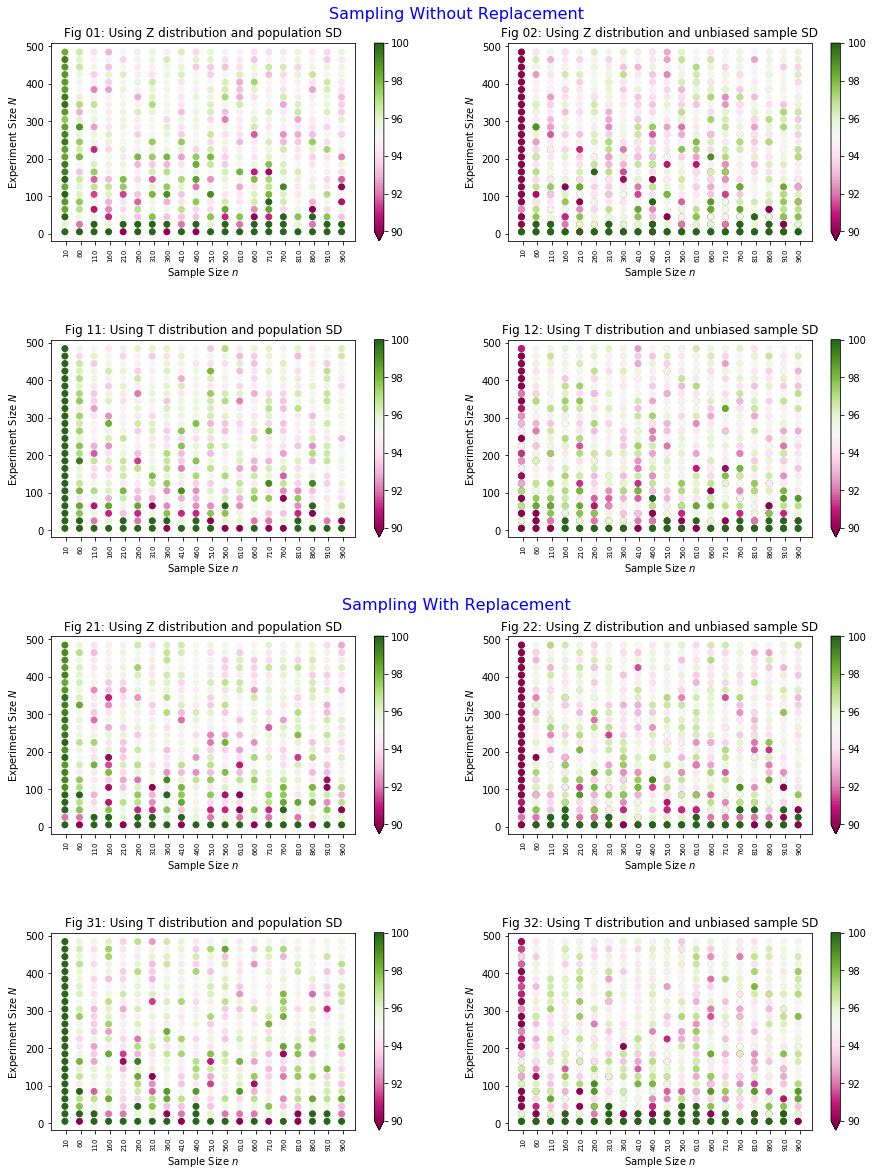

In [8]:
from ci_helpers import plot_summary


max_sample_size = int(T/4)  # 25% of total population
N_list = range(5,500,20)
n_list = range(5,max_sample_size,50)  # different sample sizes

    
plot_summary(population, N_list, n_list)

Note that, as per color gradient used, lighter the dots, nearer they are to 95%. And if green they are above 95%. And if pink, they are below 95%. So more the green dots or lighter dots, the better, the CI performance. 

1. Compared to graphs using sample SDs on right hand side, the graphs using population SDs on left hand side, has more dots that are green and lighter indicating better CI performance on LHS. This is especially very pronounced, when sample sizes are small (observe dark dots at $n=10$). LHS almost always have green dots at $n=10$ while RHS has mostly pinky dots.
2. For a common SD usage, there is not much a difference between using Z or t distribution when $n \geq 30$ . For eg, compare figures 01 and 11 both using population SD. Or compare 02 and 12 both using sample SD.
3. Comparing figures 01 and 11 at $n=10$ we observe, figure 11 performs better (more darker green dots). So when you know $\sigma$, and if $n < 30$ using Z distribution is better. 
4. Comparing figures 02 and 12 at $n=10$ we observe, figure 12 performs better (lighter pink dots). So when you do not know $\sigma$ and if $n < 30$, using T distribution with unbiased sample SD is better.
5. Similar observation also applies to sampling with replacement. 

Though the limit 30 is not obvious from above graphs, this number has been arrived at by statisticians after extensive research

## Confidence Intervals for Sample Means

### Create Population

Let Y be the random variable indicating temperature over a distribution of certain values. If limiting values are say, 0 deg C to 40 deg C, our population would thus look like this: $[23,13,35,50,10,2,5,0,33, \cdots ,21]$ Unlike Sample proportions,we do not know or designate any proportion of temperatures in this example, but we know the mean and variance by simply calculating all values in the distribution. These would be our population parameters.  

Population mean $\mu = \mu_y$  
Population variance $\sigma^2 = \sigma_y^2$  

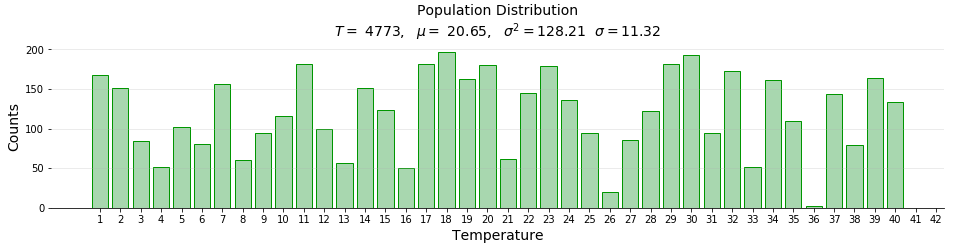

In [9]:
%matplotlib inline
from math import floor
import matplotlib.pyplot as plt
from random import random, seed, shuffle
from SDSPSM import get_metrics, drawBarGraph, getPopulationStatistics
from ci_helpers import createRandomPopulation

seed(0)

popMin = 1   # Min population
popMax = 40  # Max population
freqMax = 200 # freq of any set of population (for eg, no of occurances of temperatures at 25 deg C)

population, population_freq = createRandomPopulation(popMax - popMin + 1, freqMax)

N, mu, var, sigma = getPopulationStatistics(population_freq, popMin)

#visualize
fig, (ax1) = plt.subplots(1,1, figsize=(16,3))
drawBarGraph(population_freq, ax1, [N, mu, var, sigma], 'Population Distribution','Temperature', 'Counts')
plt.show()

Let us visualize the density function and PMF as usual.  

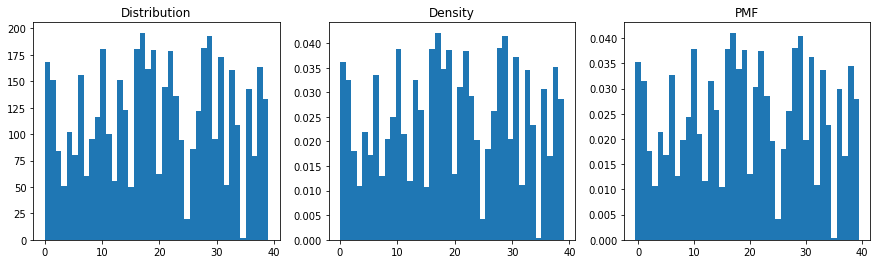

In [10]:
from ci_helpers import mini_plot_SDSM

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
mini_plot_SDSM(population, ax1, ax2, ax3, popMax, width=1)
plt.show()

### Sampling from the Population 

Let us sample from above population, N no of times, each time with sample set of size n. If $n > 30$, the resulting sampling distribution should be approximately normal (always if population itself was normally distributed)

Remember, for Population described by random variable Y, we describe the sampling distribution of sample means by

\begin{equation}
\color {blue}{
\begin{aligned}
\mu_{\overline{Y}} = \mu(\overline{\widehat{Y}}) \\ \\
\sigma_{\overline{Y}} = \sigma(\overline{\widehat{Y}})
\end{aligned}
}
\end{equation}

where the $\widehat{}$ indicates the statistical outcome. And statistically by CLT, 


\begin{equation}
\color {blue} {
\begin{aligned}
\mu_{\overline{Y}} = 19.4 \approx 20 = \mu \\ \\
\sigma_{\overline{Y}} \approx 1.52 \approx \dfrac{11.32}{\sqrt{50}} = \dfrac {\sigma}{\sqrt{n}}  
\end{aligned}
}
\end{equation}


>$\overline{Y}$ is called the sample means which is a random variable.

<IPython.core.display.Math object>

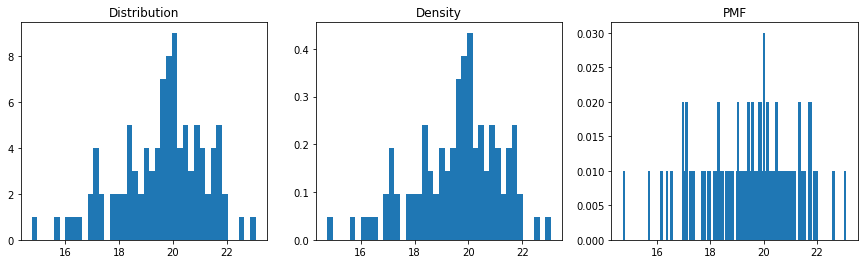

In [11]:
from ci_helpers import sample_with_CI
from random import seed

N = 100
n = 50

#seed(0)

# sample from population
Y_mean_list, CI_list = sample_with_CI(N, n, population, sigma=sigma, mode='z')

# sample metrics
mu, var, sigma = get_metrics(Y_mean_list)

# visualize
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
mini_plot_SDSM(Y_mean_list, ax1, ax2, ax3, popMax, width=0.1)

from IPython.display import display, Math
display(Math(r'\mu_{{\hat{{p}}}}:{} \ \ \ \ \sigma_{{\hat{{p}}}}:{}'.format(mu, sigma)))

> Ok I get it, the resulting distribution and density functions look abnormal (ugly, slightly normal). Try increasing experiment size N, and you will see much better approximation of normal distribution. We had to stick with N=100 because we have to see how CI from each sample mean performs, so bear with me here.

### When $\sigma$ is known

For each of above sample set of size 'n', let us calculate confidence interval using population SD $\sigma$ as below. 1.96 is from Z tranformation for 95% confidence interval, like we saw earlier in our theoretical section.

\begin{equation}
\color{blue}{CI = \overline{Y} \pm 1.96 \dfrac{\sigma}{\sqrt{n}}}  
\end{equation}

where, $\overline{Y}$ is random variable, a simpler notation for each sample set's **mean**, i.e $\overline{Y} = \overline{\widehat{Y_k}} = \dfrac {1}{n} \sum\limits_{i=1}^n Y_{ki}$, that is, a **sample mean** (for instance, in this example, in any sample set having range of temperature values, dividing by sample set's length will give the **mean** temperature of that sample set)

CI containing pop.mean:95.0%


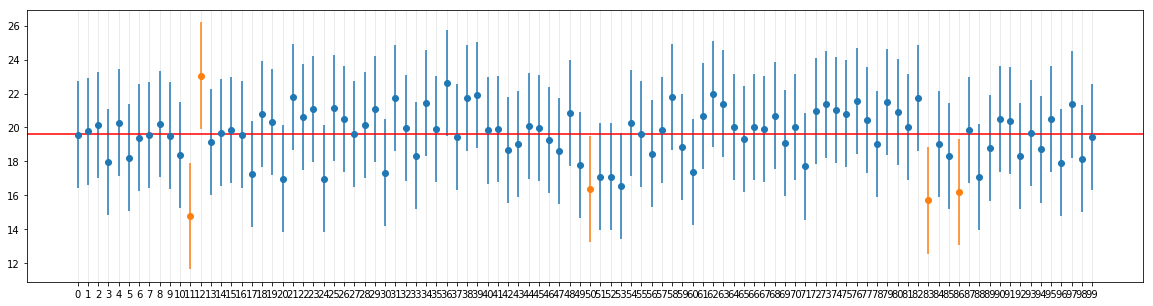

In [12]:
from ci_helpers import plot_ci_accuracy_1

fig, ax = plt.subplots(1,1, figsize=(20,5))
   
plot_ci_accuracy_1(ax, CI_list, mu)
plt.show()

### When $\sigma$ is not known

**When we do not know population SD**  

Just like earlier, for each sample mean $\overline{X_k}$ calculated, the confidence interval is calculated as below. Note, the constant value $t_{n-1}$ depends on degrees of freedom (n-1). 


\begin{equation}
\color{blue}{CI = \overline{Y} \pm t_{n-1} \dfrac{S_k}{\sqrt{n}}}
\end{equation}

where, $\overline{Y}$ is random variable, a simpler notation for each sample set's **mean**, i.e $\overline{Y} = \overline{\widehat{Y_k}} = \dfrac {1}{n} \sum\limits_{i=1}^n Y_{ki}$, that is, a **sample mean** (for instance, in this example, in any sample set having range of temperature values, dividing by sample set's length will give the **mean** temperature of that sample set)

<IPython.core.display.Math object>

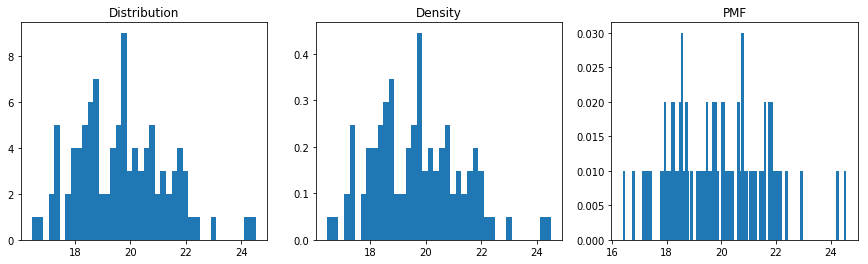

In [13]:
from ci_helpers import sample_with_CI

N = 100
n = 50

#seed(0)

# sample from population, this time in t mode, 
# so CI intervals are calculated with t value 2.093
Y_mean_list, CI_list = sample_with_CI(N, n, population, sigma=sigma, mode='t')

# sample metrics
mu, var, sigma = get_metrics(Y_mean_list)

# visualize
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
mini_plot_SDSM(Y_mean_list, ax1, ax2, ax3, popMax, width=0.1)

from IPython.display import display, Math
display(Math(r'\mu_{{\hat{{p}}}}:{} \ \ \ \ \sigma_{{\hat{{p}}}}:{}'.format(mu, sigma)))

plt.show()

CI containing pop.mean:97.0%


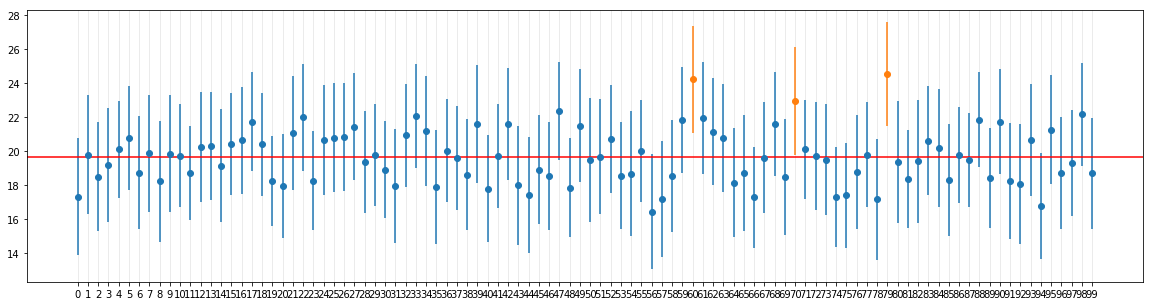

In [14]:
from ci_helpers import plot_ci_accuracy_1

fig, ax = plt.subplots(1,1, figsize=(20,5))
   
plot_ci_accuracy_1(ax, CI_list, mu)
plt.show()

<a id="digging-deeper-2"></a>

### Digging deeper 2

What if I use Z distribution and unbiased sample SD even for CI? What happens when I use t distribution but population SD for CI? We will find out what happens in such cases below. 

**Environment:**  
1. Population size T, fixed  
2. Sample size n, varied  
3. Experiment size N, varied  
4. Sampling with or without replacement, varied.


**Applied methods:**  
1. Z distribution and population SD  
2. Z distribution and unbiased sample SD  
3. T distribution and population SD  
4. T distribution and unbiased sample SD  

Note, in case of sampling without replacement, each sample SD is corrected with FPC (Finite Population Correction)

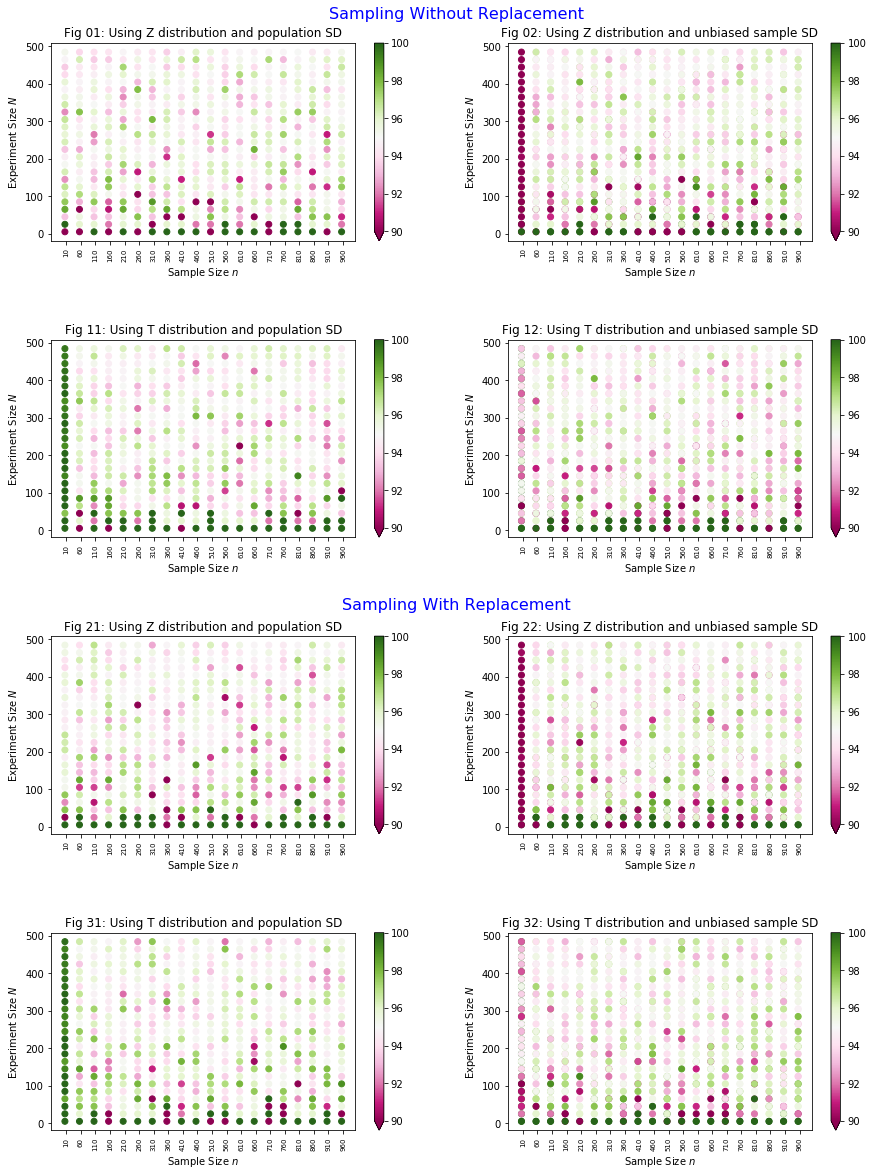

In [15]:
max_sample_size = int(T/4)  # 25% of total population
N_list = range(5,500,20)
n_list = range(5,max_sample_size,50)  # different sample sizes

    
plot_summary(population, N_list, n_list)

Note that, as per color gradient used, lighter the dots, nearer they are to 95%. And if green they are above 95%. And if pink, they are below 95%. So more the green dots or lighter dots, the better, the CI performance. 

1. Compared to graphs using sample SDs on right hand side, the graphs using population SDs on left hand side, has more dots that are green and lighter indicating better CI performance on LHS. This is especially very pronounced, when sample sizes are small (observe dark dots at $n=10$). LHS almost always have green dots at $n=10$ while RHS has mostly pinky dots.
2. For a common SD usage, there is not much a difference between using Z or t distribution when $n \geq 30$ . For eg, compare figures 01 and 11 both using population SD. Or compare 02 and 12 both using sample SD.
3. Comparing figures 01 and 11 at $n=10$ we observe, figure 11 performs better (more darker green dots). So when you know $\sigma$, and if $n < 30$ using Z distribution is better. 
4. Comparing figures 02 and 12 at $n=10$ we observe, figure 12 performs better (lighter pink dots). So when you do not know $\sigma$ and if $n < 30$, using T distribution with unbiased sample SD is better.
5. Similar observation also applies to sampling with replacement. 

Though the limit 30 is not obvious from above graphs, this number has been arrived at by statisticians after extensive research.

Yes, the inferences are same as [earlier ones](#digging-deeper-1) except that the differences are much more clearer in this case. For eg, compare figures 02 and 12 at $n=10$. It is very clear now, why figure 12 (using t distribution) is far better at lower sample sizes. 